In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
DF=pd.read_csv('student_scores.csv')

In [3]:
DF.head()

,Hours,Scores
0,6.8,68
1,1.7,21
2,6.3,28
3,4.4,35
4,8.7,24


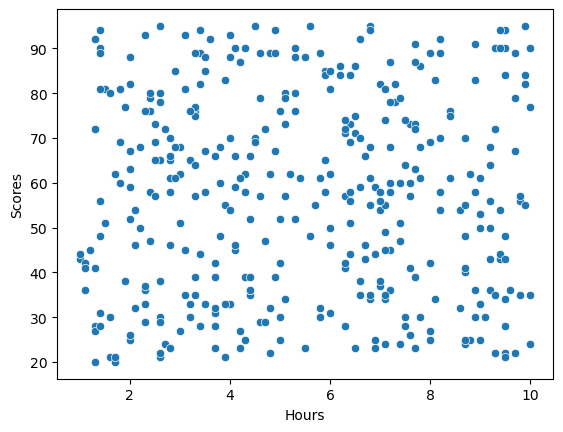

In [4]:
sns.scatterplot(x=DF['Hours'],y=DF['Scores'])
plt.show()

In [5]:
x_new=pd.DataFrame([DF['Hours'].min(),DF['Hours'].max()])
y_new=pd.DataFrame([DF['Scores'].min(),DF['Scores'].max()])

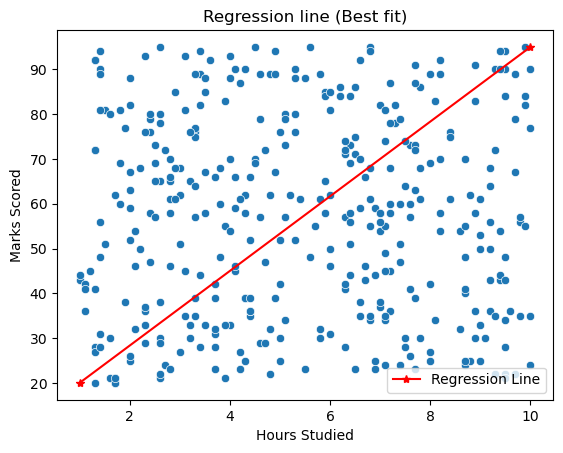

In [6]:
sns.scatterplot(x=DF['Hours'],y=DF['Scores'])
plt.plot(x_new,y_new,color='red',label='Regression Line',marker='*')
plt.title('Regression line (Best fit)')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.legend()
plt.show()

In [9]:
X=np.array(DF['Hours']).reshape(-1,1)
Y=np.array(DF['Scores'])

In [10]:
model=LinearRegression()

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [12]:
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 300
Testing set size: 76


In [13]:
model.fit(X_train,Y_train)

LinearRegression()

In [14]:
Ypred=model.predict(X_test)

In [15]:
slope=model.coef_[0]
intercept=model.intercept_

In [16]:
print(slope)
print(intercept)

-0.18835550478518165
57.354608319109516


In [17]:
model.predict([[5]])

array([56.4128308])

In [18]:
results=pd.DataFrame({'Actual Scores': Y_test, 'Predicted Scores': Ypred})
print(results)

    Actual Scores  Predicted Scores
0              51         56.149133
1              80         56.902555
2              68         55.621738
3              24         55.471053
4              69         55.847764
..            ...               ...
71             58         55.998449
72             94         55.584067
73             81         56.224475
74             90         55.602902
75             82         56.714200

[76 rows x 2 columns]


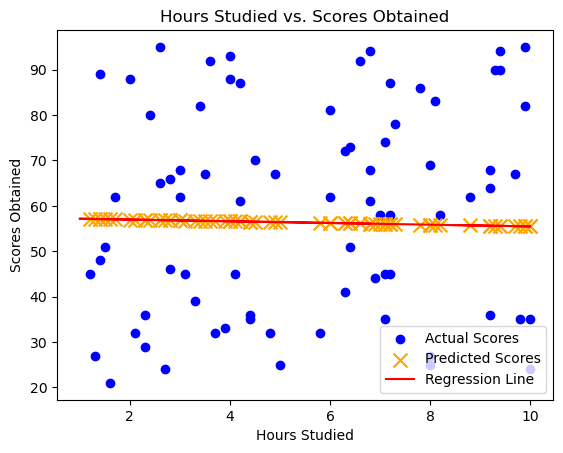

In [25]:
plt.scatter(X_test, Y_test, color='blue', label='Actual Scores')
plt.scatter(X_test, Ypred, color='orange', label='Predicted Scores', s=100, marker='x')
hours_range=np.array(DF['Hours']).reshape(-1,1)
predicted_scores=model.predict(hours_range)
plt.plot(hours_range, predicted_scores, color='red', label='Regression Line')
plt.title('Hours Studied vs. Scores Obtained')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()